In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import root_mean_squared_error
from skimage.metrics import structural_similarity as ssim

In [14]:
def calculate_similarity(df1, df2):
    """Calculates the MSE between two datasets representing game boards."""
    mse = root_mean_squared_error(df1.values.flatten(), df2.values.flatten())
    return mse

In [15]:
def compare_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    similarities = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            similarity = calculate_similarity(df, last_df)
            similarities[label] = similarity
            print(f"MSE between {label} and {last_label}: {similarity:.4f}")
    
    return similarities

In [16]:
def plot_game_board(board_size, game_row, ax, dataset_name):
    board = game_row.drop('winner').values.reshape(board_size, board_size)
    sns.heatmap(board, annot=True, cmap='coolwarm', cbar=False, linewidths=.5, ax=ax)
    ax.set_title(f"{dataset_name}: (Winner: {game_row['winner']})")

In [17]:
def plot_random_game_boards(datasets, num_rows=10):
    for _ in range(num_rows):
        fig, axes = plt.subplots(1, len(datasets), figsize=(18, 4))
        
        # Iterate through datasets and plot each one
        for ax, (label, df) in zip(axes, datasets.items()):
            random_idx = np.random.randint(0, len(df))
            plot_game_board(15, df.iloc[random_idx], ax, label)
        
        # Adjust layout and show
        plt.tight_layout()
        plt.show()

In [18]:
file_paths = [
    ('data/old/15x15_200000_coord_034711_0.csv', 'NO Threshold'),
    ('/mnt/b/TsetlinModels/data/15x15_2000_10_0.csv', 'Threshold 10%'),
    ('/mnt/b/TsetlinModels/data/15x15_2000_20_0.csv', 'Threshold 20%'),
    ('/mnt/b/TsetlinModels/data/15x15_2000_30_0.csv', 'Threshold 30%'),
    ('/mnt/b/TsetlinModels/data/15x15_2000_40_0.csv', 'Threshold 40%'),
    ('/mnt/b/TsetlinModels/data/15x15_2000_50_0.csv', 'Threshold 50%'),
    ('data/old/hex_games_15.csv', 'Threshold N30')
]

In [19]:
datasets = {name: pd.read_csv(path, nrows=100) for path, name in file_paths}

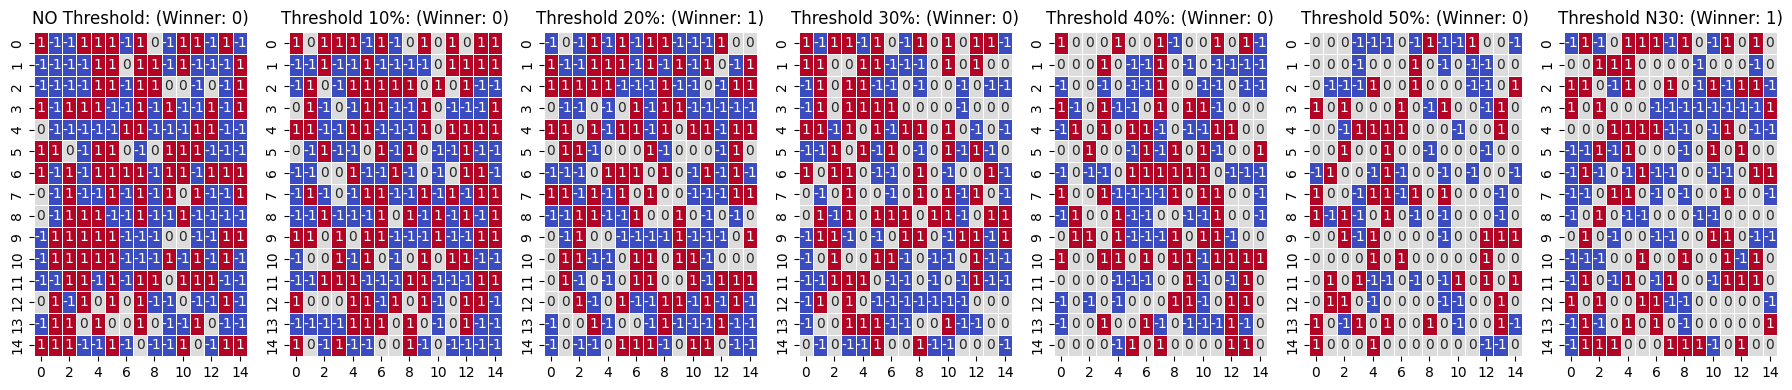

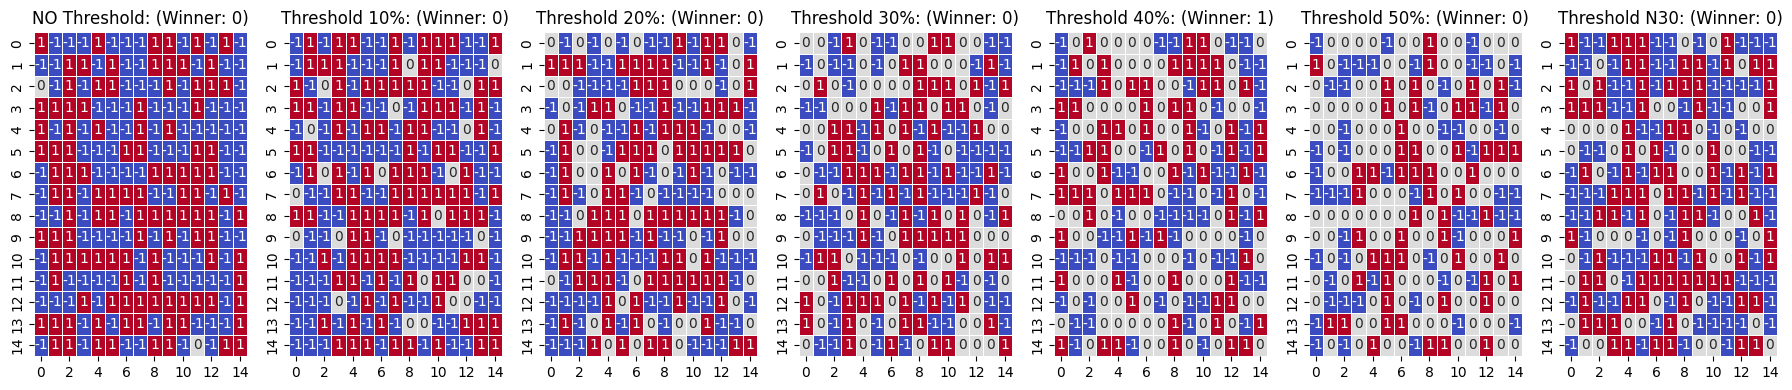

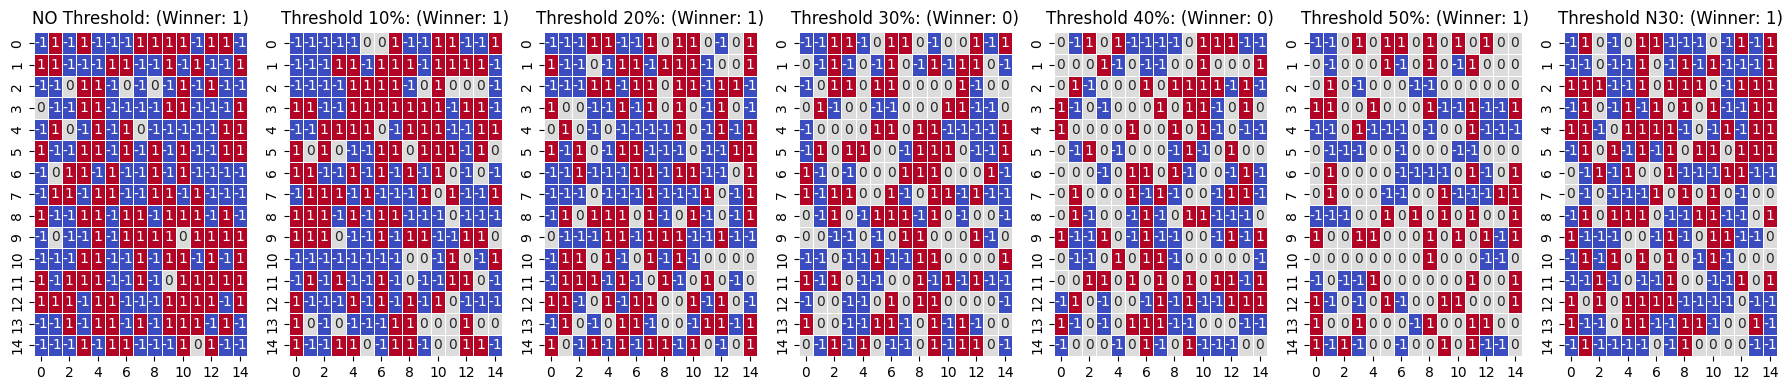

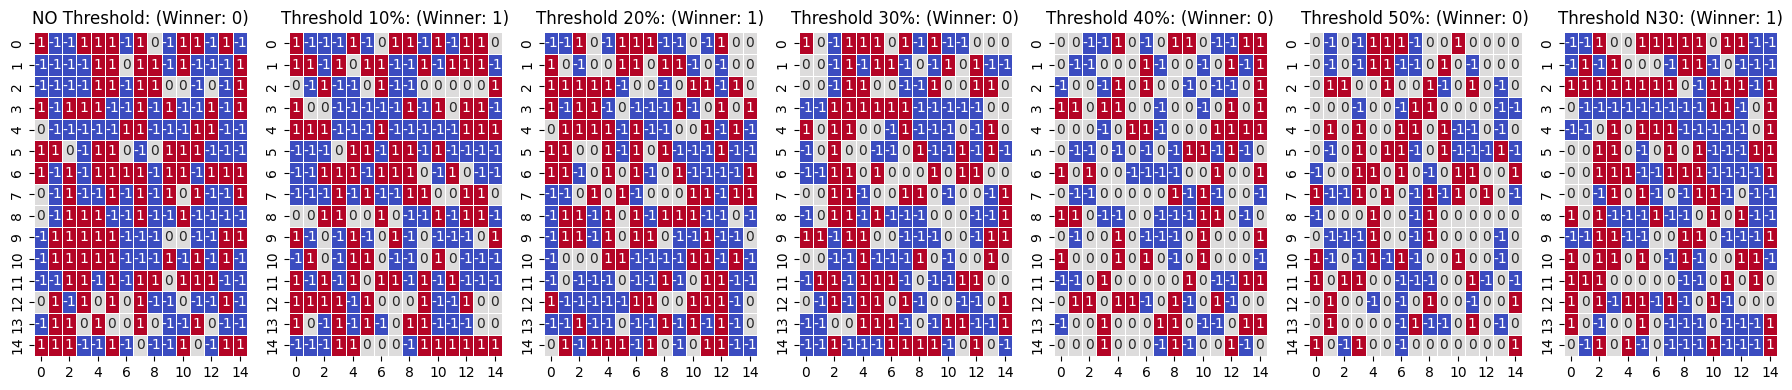

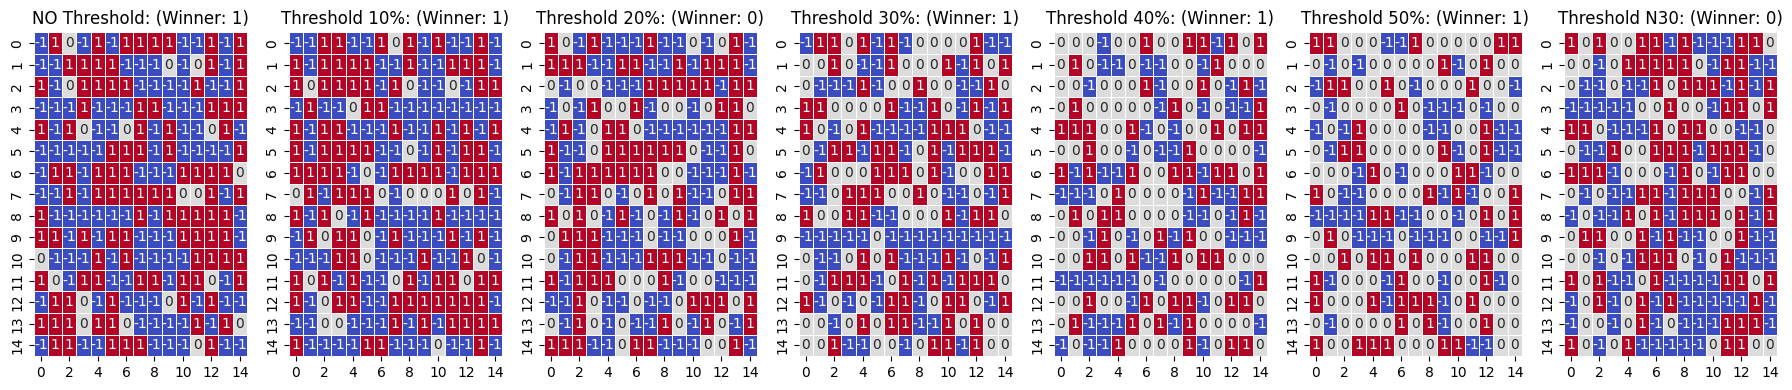

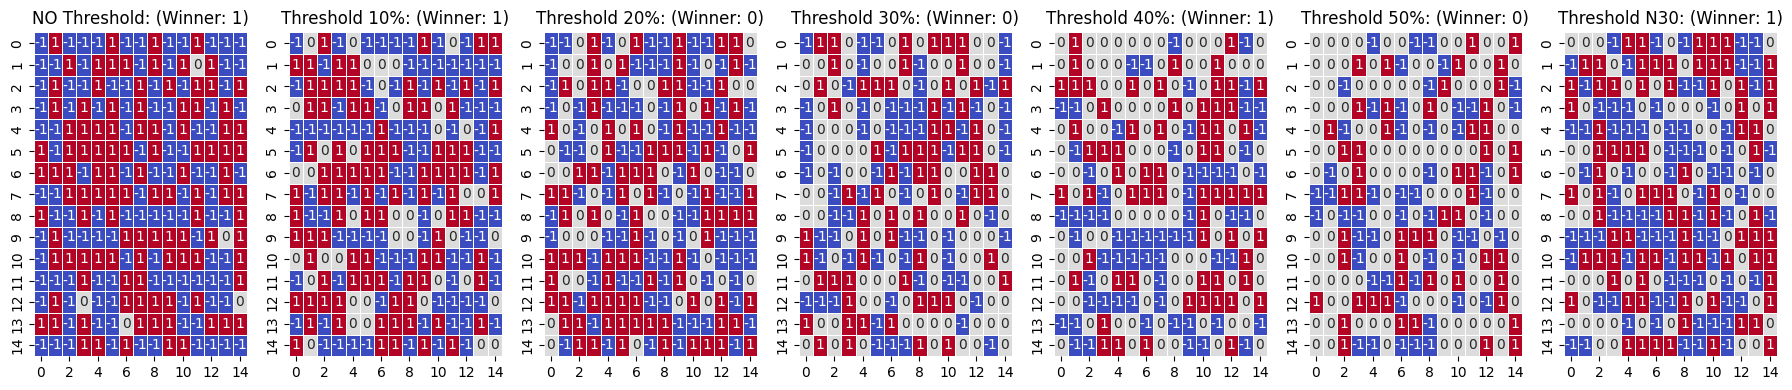

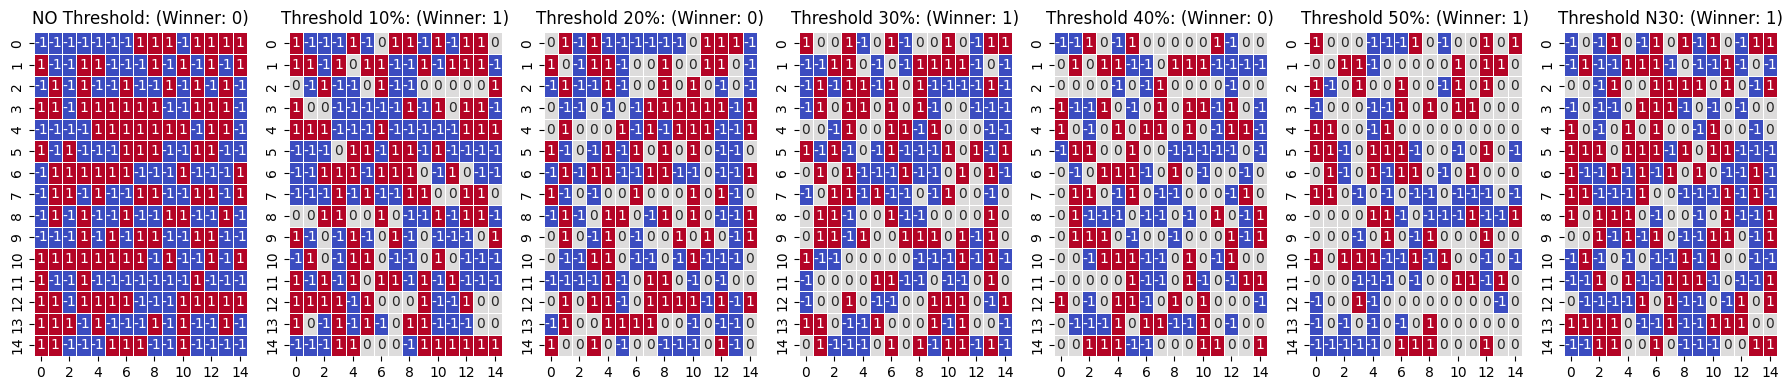

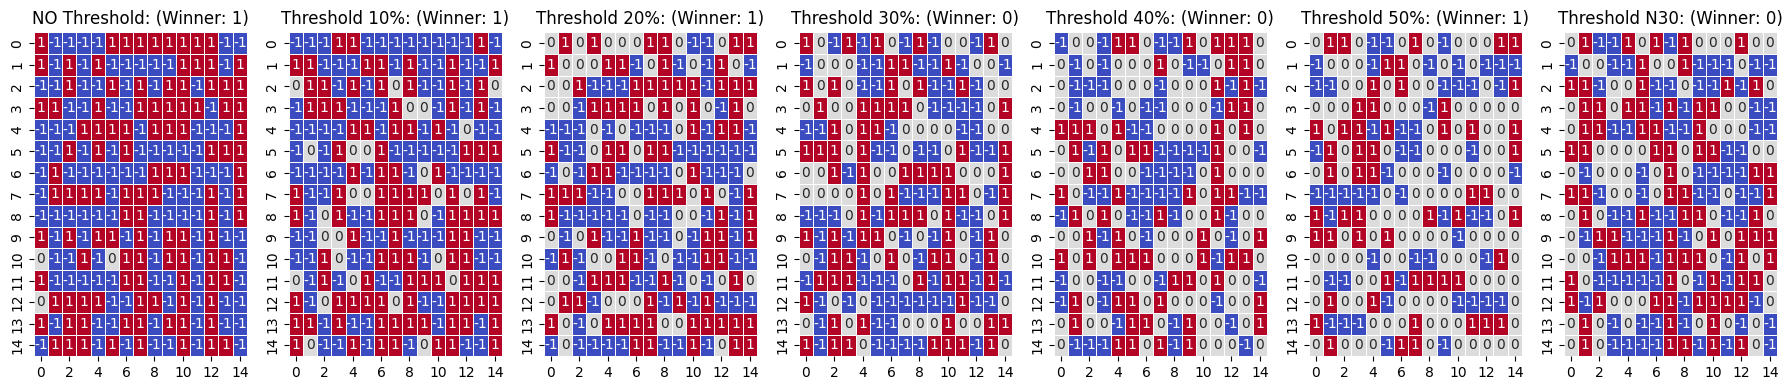

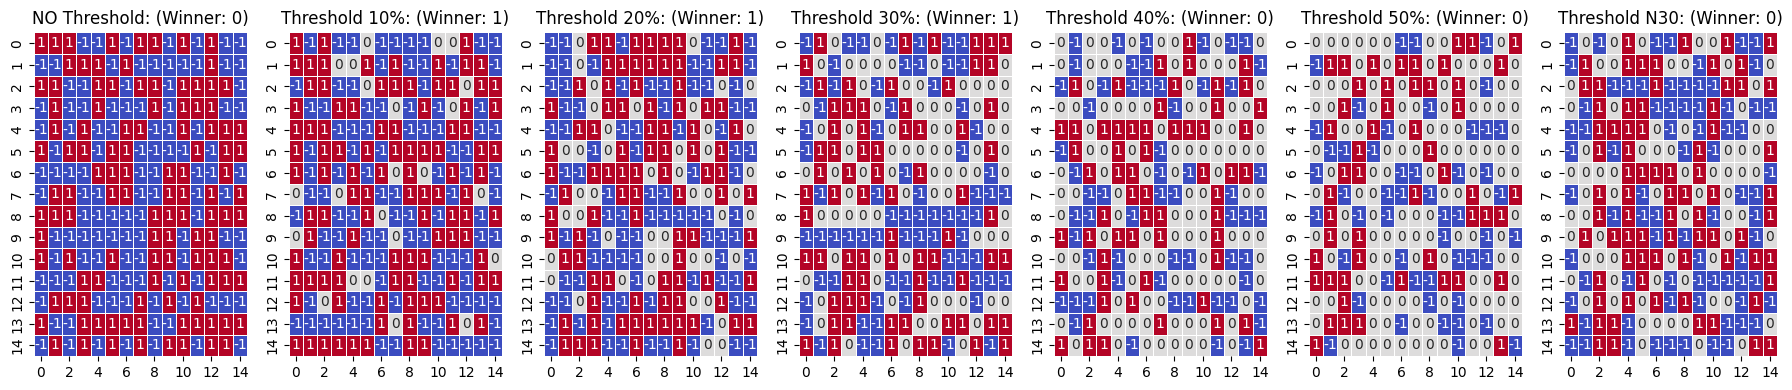

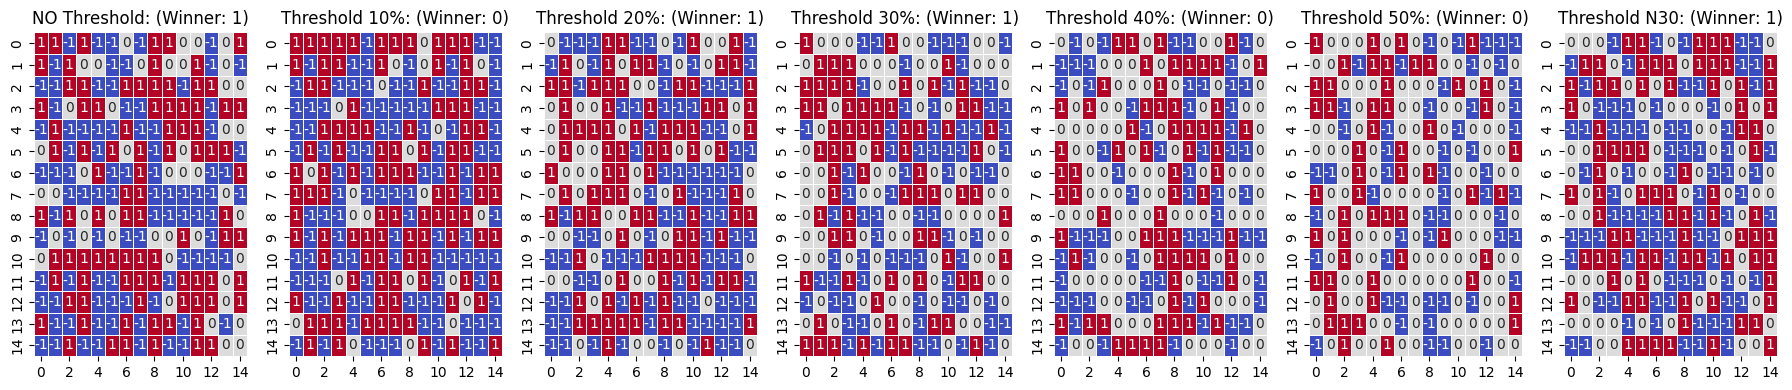

In [20]:
plot_random_game_boards(datasets)

In [21]:
similarities = compare_with_last_dataset(datasets)

MSE between NO Threshold and Threshold N30: 1.2750
MSE between Threshold 10% and Threshold N30: 1.2579
MSE between Threshold 20% and Threshold N30: 1.2098
MSE between Threshold 30% and Threshold N30: 1.1828
MSE between Threshold 40% and Threshold N30: 1.1298
MSE between Threshold 50% and Threshold N30: 1.0977


In [22]:
def calculate_ssim(df1, df2):
    """Calculates the SSIM between two datasets representing game boards."""
    ssim_value, _ = ssim(df1.values, df2.values, full=True)
    return ssim_value

# Compare middle datasets to the last dataset (Threshold N30)
def compare_ssim_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    ssim_scores = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            ssim_value = calculate_ssim(df, last_df)
            ssim_scores[label] = ssim_value
            print(f"SSIM between {label} and {last_label}: {ssim_value:.4f}")
    
    return ssim_scores

# Call the function to compare using SSIM
ssim_scores = compare_ssim_with_last_dataset(datasets)


SSIM between NO Threshold and Threshold N30: 1.0000
SSIM between Threshold 10% and Threshold N30: 1.0000
SSIM between Threshold 20% and Threshold N30: 1.0000
SSIM between Threshold 30% and Threshold N30: 1.0000
SSIM between Threshold 40% and Threshold N30: 1.0000
SSIM between Threshold 50% and Threshold N30: 1.0000


/tmp/ipykernel_238657/2487267110.py:3: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_value, _ = ssim(df1.values, df2.values, full=True)


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(df1, df2):
    """Calculates the cosine similarity between two datasets."""
    vector1 = df1.values.flatten().reshape(1, -1)
    vector2 = df2.values.flatten().reshape(1, -1)
    cos_sim = cosine_similarity(vector1, vector2)[0][0]
    return cos_sim

# Compare middle datasets to the last dataset (Threshold N30)
def compare_cosine_with_last_dataset(datasets, last_label='Threshold N30'):
    last_df = datasets[last_label]
    cosine_scores = {}
    
    # Compare each middle dataset to the last dataset
    for label, df in datasets.items():
        if label != last_label:
            cos_sim = calculate_cosine_similarity(df, last_df)
            cosine_scores[label] = cos_sim
            print(f"Cosine Similarity between {label} and {last_label}: {cos_sim:.4f}")
    
    return cosine_scores

# Call the function to compare using Cosine Similarity
cosine_scores = compare_cosine_with_last_dataset(datasets)

Cosine Similarity between NO Threshold and Threshold N30: 0.0046
Cosine Similarity between Threshold 10% and Threshold N30: -0.0073
Cosine Similarity between Threshold 20% and Threshold N30: 0.0048
Cosine Similarity between Threshold 30% and Threshold N30: -0.0067
Cosine Similarity between Threshold 40% and Threshold N30: 0.0145
Cosine Similarity between Threshold 50% and Threshold N30: 0.0033


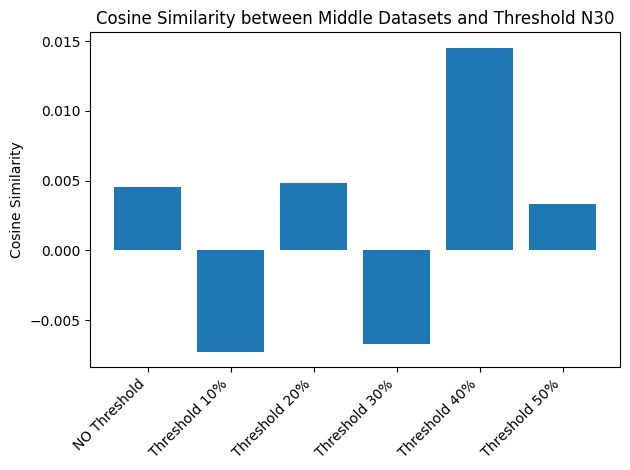

In [24]:
import matplotlib.pyplot as plt

# Example: Visualize Cosine Similarity results
def plot_similarity(similarity_scores, method='Cosine Similarity'):
    labels = list(similarity_scores.keys())
    values = list(similarity_scores.values())
    
    plt.bar(labels, values)
    plt.title(f'{method} between Middle Datasets and Threshold N30')
    plt.ylabel(method)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot the cosine similarity scores
plot_similarity(cosine_scores, method='Cosine Similarity')